For this activity I explored the Consumer Price Index data from the Bureau of Labor and Statistics
https://www.bls.gov/cpi/data.htm

For a better understanding of the consumer price index visit:
https://www.investopedia.com/terms/c/consumerpriceindex.asp

In [112]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

Creating a dataframe from the downloaded Consumer Price Index File

In [113]:
#create a dataframe from an xls file
price_index_df = pd.read_excel('data/ConsumerPriceIndex.xlsx', index_col='Year')
price_index_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0
1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1
1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3
1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6
1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7


In [114]:
#stack the months under the year
price_index_df = price_index_df.stack().reset_index()
price_index_df.columns = ['Year', 'Month', 'PriceIndex']
price_index_df.head()



,Year,Month,PriceIndex
0,1913,Jan,9.8
1,1913,Feb,9.8
2,1913,Mar,9.8
3,1913,Apr,9.8
4,1913,May,9.7


In [115]:
#create a new data column that combines year and month
price_index_df['Date'] = price_index_df[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
#put the date column as the index in move to the front
price_index_df = price_index_df.set_index('Date').drop(['Year', 'Month'], axis=1)
price_index_df.head()



,PriceIndex
Date,
1913-Jan,9.8
1913-Feb,9.8
1913-Mar,9.8
1913-Apr,9.8
1913-May,9.7


In [116]:
#convert the date column to datetime
price_index_df.index = pd.to_datetime(price_index_df.index)
#convert the price index column to float
price_index_df['PriceIndex'] = price_index_df['PriceIndex'].astype(float)
price_index_df.head()

,PriceIndex
Date,
1913-01-01,9.8
1913-02-01,9.8
1913-03-01,9.8
1913-04-01,9.8
1913-05-01,9.7


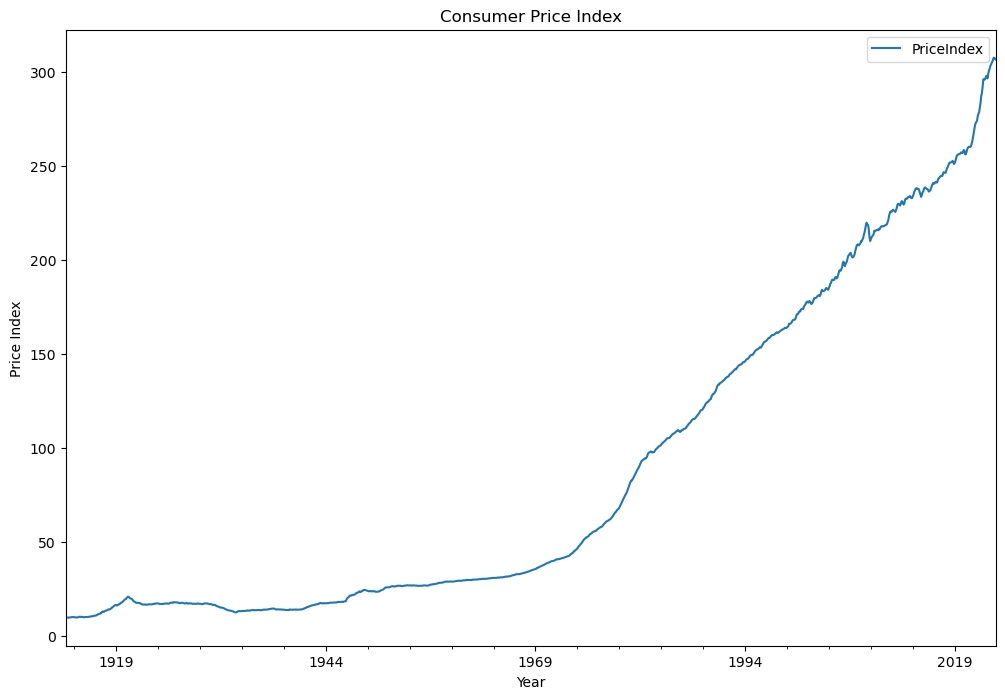

In [117]:
#plot the price index on a line graph
price_index_df.plot(figsize=(12,8), title='Consumer Price Index')
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.show()


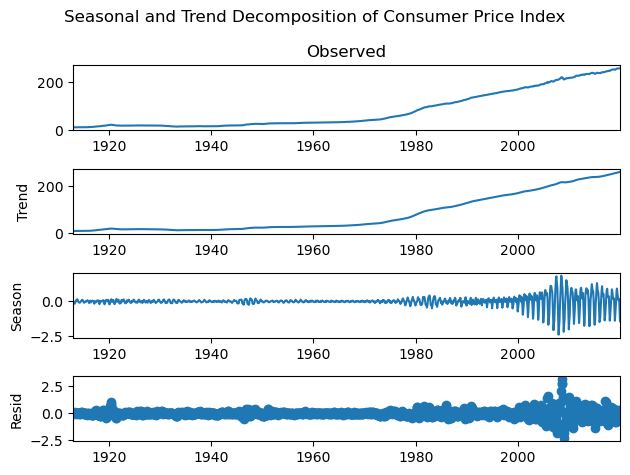

In [118]:
#split the data into historical and future data sets
historical_data = price_index_df.loc[:'2019-12-01']
future_data = price_index_df.loc['2020-01-01':]

#create an instance of the STL class to pass the historical data to
stl = STL(historical_data, period = 12)
#fit the data to the model
results = stl.fit()
#plot the results
fig = results.plot()
#add a title to the plot
fig.suptitle('Seasonal and Trend Decomposition of Consumer Price Index')
#move the title up
fig.tight_layout()
plt.show()

/Users/amyfolkestad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


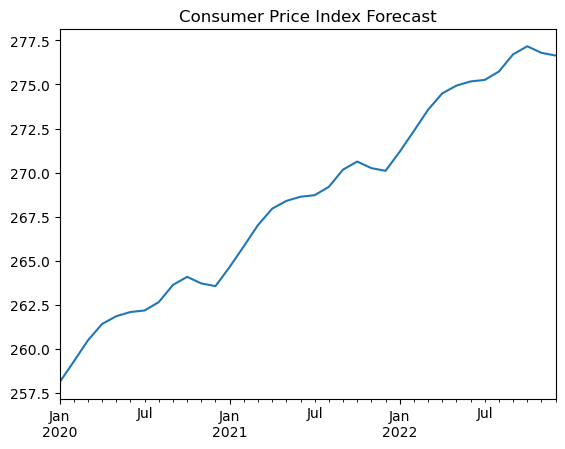

,Forecast,Actual,Difference
2020-01-01,258.088744,257.971,0.117744
2020-02-01,259.266221,258.678,0.588221
2020-03-01,260.470361,258.115,2.355361
2020-04-01,261.400475,256.389,5.011475
2020-05-01,261.841994,256.394,5.447994
2020-06-01,262.079348,257.797,4.282348
2020-07-01,262.167045,259.101,3.066045
2020-08-01,262.642737,259.918,2.724737
2020-09-01,263.617805,260.280,3.337805
2020-10-01,264.076373,260.388,3.688373


In [119]:
#build a forecast using a seasonal and trend additive model using statsmodels
model = sm.tsa.ExponentialSmoothing(historical_data, trend='add', seasonal='add', seasonal_periods=12)
#fit the model to the data
model_fit = model.fit()
#plot the forecast
fig = model_fit.forecast(36).plot()
plt.title('Consumer Price Index Forecast')
plt.show()

#create a dataframe of the forecasted values
forecast_df = pd.DataFrame(model_fit.forecast(36))
forecast_df.columns = ['Forecast']

#add a column to the forecast dataframe that contains the actual values
forecast_df['Actual'] = future_data

#add a column to show the difference between the forecast and actual values
forecast_df['Difference'] = forecast_df['Forecast'] - forecast_df['Actual']
forecast_df



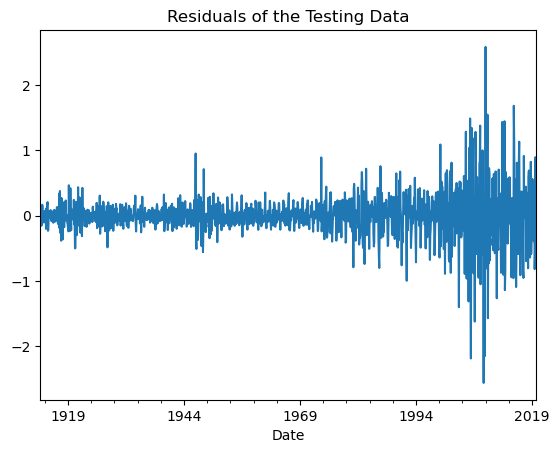

Mean Squared Error on the testing data: 0.125


In [120]:
#show the residuals of the testing data
model_fit.resid.plot()
#add a title to the plot
plt.title('Residuals of the Testing Data')
plt.show()

#calculate the mean squared error
mse = np.mean(model_fit.resid**2)
print('Mean Squared Error on the testing data: %.3f' % mse)




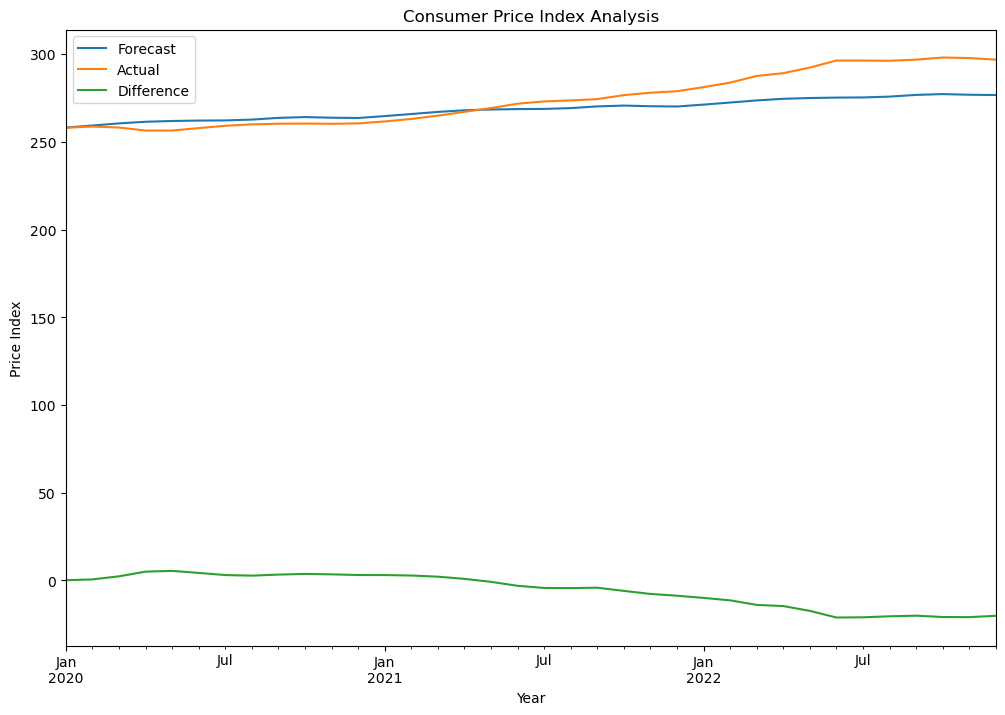

In [121]:
#create a plot that includes the actual data and the forecasted data
fig = forecast_df.plot(figsize=(12,8), title='Consumer Price Index Analysis')
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.show()

